# Project Description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB: The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

Following steps will conducted to complete the task:

**Import and Preprocessing data**
- open the datafile
- deal with column names, missing values, data types (with appropariate reason how you deal with them).
- calcualte the total sales (the sum of sales in all regions) for each game

**Analyze the data**
- How many games were released in different years?
- How sales varied from platform to platform. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking?
- How global sales of all games broken down by platform? Are the differences in sales significant? What about average sales on various platforms?
- How user and professional reviews affect sales for one popular platform (you choose)?
- What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

**Create a user profile for regions: NA, EU, JP**

- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

**Test the hypotheses**
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.
    - How you formulated the null and alternative hypotheses?
    - What significance level you chose to test the hypotheses, and why?

**Data Description**
- `Name` — game name
- `Platform` — platform
- `Year_of_Release` — release year
- `Genre` - game genre
- `NA_sales` - sales in North America (millions of copies sold)
- `EU_sales` - sales in Europe (millions of copies sold)
- `JP_sales` - sales in Japan (millions of copies sold)
- `Other_sales` - sales in other countries (millions of copies sold)
- `Critic_Score` - score of critics (maximum 100)
- `User_Score` - user score (maximum 10)
- `Rating` — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016 may not be complete.


# Importing libraries and opening datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import warnings
import plotly.io as pio


#pyo.init_notebook_mode()
pio.renderers.default = "svg"
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# file loading for Windows
try: 
    games_df = pd.read_csv('datasets/games.csv')
    
# file loading for Linux(?)    
except:
    games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


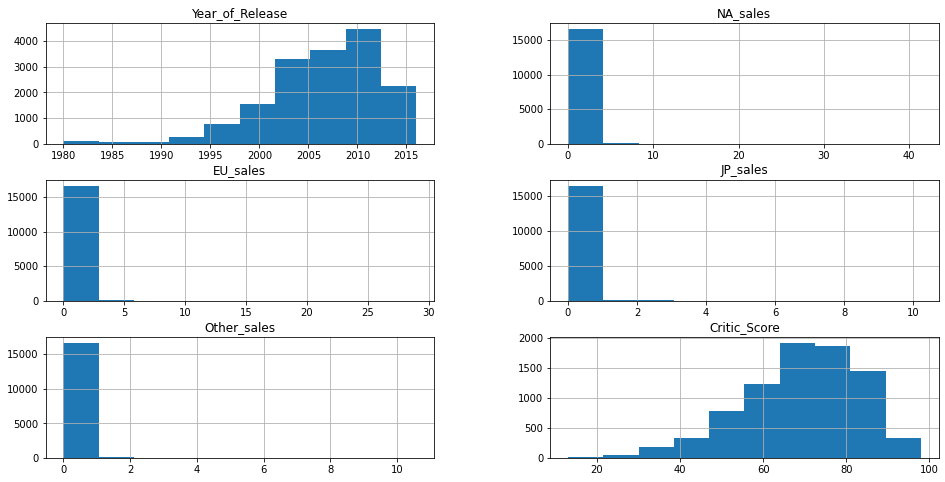

In [5]:
games_df.hist(figsize=(16, 8))
plt.show()

In [6]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
games_df.describe(include=['object', 'bool'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Intermediate output:**

- all column names must be reduced to lowercase
- there are missing values in columns `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`
- `User_Score` must be cast to `float`

# 4   Data preparation
## 4.1   Let's replace the names of the columns (reduce to lower case); 

In [8]:
games_df.columns = [x.lower() for x in games_df.columns]

## Let's convert the data to the required types. Let's describe in which columns the data type was replaced and why

The data type in the `year_of_release` and `critic_scores` columns will be replaced with the `nullable int type` data type for beauty and reduced memory usage.

In [9]:
games_df.year_of_release = games_df.year_of_release.astype('Int16')
games_df.critic_score = games_df.critic_score.astype('Int8')

In [10]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int8   
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int16(1), Int8(1), float64(4), object(5)
memory usage: 1.2+ MB


**Intermediate conclusion:** Replacing data types allowed us to slightly reduce the amount of the used memory. It is not worth translating data types in the platform, genre, and rating columns in a category - then there will be problems with graphs.

## Handling missing values

### Columns: `name` and `genre`
As you can see, there are only 2 missing values, they intersect and most of the data is missing from them. Let's remove these missing values.

In [11]:
games_df[(games_df.name.isna()) & ((games_df.genre.isna()))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [12]:
games_df.dropna(subset=['name', 'genre'], inplace=True)

### Column `year_of_release`

We see that we have 269 NaNs in this column. 17 games have the release year at the end of their name. We can get it using regular expressions. However, some games are released, say, in December 2007 (for example), and the title may already be 2008. Or some game named e.g. "Bladerunner 2049" with a release year omitted will hurt our dataset. So it's better not to touch this matter.

In [13]:
games_df.year_of_release.isna().sum()

269

In [14]:
games_df[games_df.year_of_release.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN


**Handling the abbreviation `tbd`**

The abbreviation itself means `to be discussed` , i.e. evaluation is still under discussion. In fact, this is the same value omission, i.e. NaN

In [15]:
games_df[games_df.user_score=='tbd'].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12445,A-Train: City Simulator,3DS,2014,Simulation,0.00,0.00,0.06,0.00,65,tbd,E10+
2914,FIFA Soccer 11,DS,2010,Sports,0.13,0.49,0.00,0.08,63,tbd,E
9842,MTV Sports: Pure Ride,PS,2000,Sports,0.07,0.05,0.00,0.01,70,tbd,NaN
12142,My Dress-Up,DS,2008,Misc,0.06,0.01,0.00,0.01,<NA>,tbd,E10+
8356,Garfield: Lasagna World Tour,PS2,2007,Action,0.08,0.06,0.00,0.02,<NA>,tbd,E


In [16]:
games_df.user_score = games_df.user_score.replace(('tbd', np.nan))

`User_Score` casting to `float` type

In [17]:
games_df.user_score = games_df.user_score.astype('float')

**Conclusion for other NaNs:** We also have a lot of NaN values in the `user_score`, `critic_score` and `rating` columns, but there is no system in them and it is not possible to fill them. Therefore, let's leave everything as it is. `tbd` values filled with NaNs.

## Let's calculate the total sales in all regions and write them in a separate column.

In [18]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,8.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,8.0,NaN,31.38


# Exploratory Data Analysis (EDA)
## Let's see how many games were released in different years. Is data for all periods important?

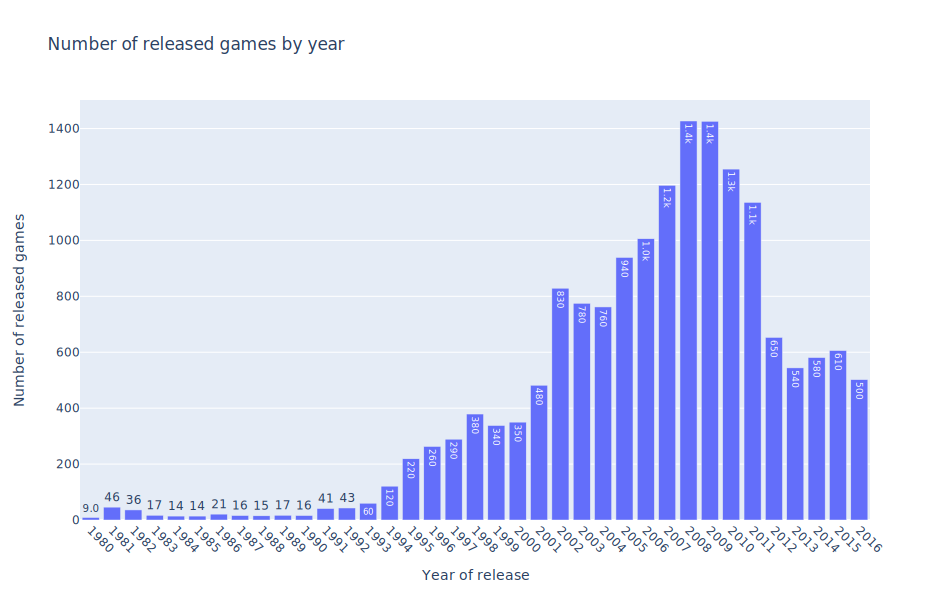

In [19]:
fig = px.bar(games_df.groupby('year_of_release')[['name']].count().reset_index(), 
             x='year_of_release', y='name', labels={'name':'Number of released games', 'year_of_release': 'Year of release'},
             text_auto='.2s', title='Number of released games by year', width=950, height=600)
fig.update_layout(xaxis = dict(dtick = 1))
fig.update_xaxes(tickangle=45)
fig.show()

**Intermediate conclusion:** The annual number of released games begins to rise sharply starting in 1994, and after 2010, a sharp drop is noticeable.

## Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. How long does it take for new platforms to appear and old ones to disappear?

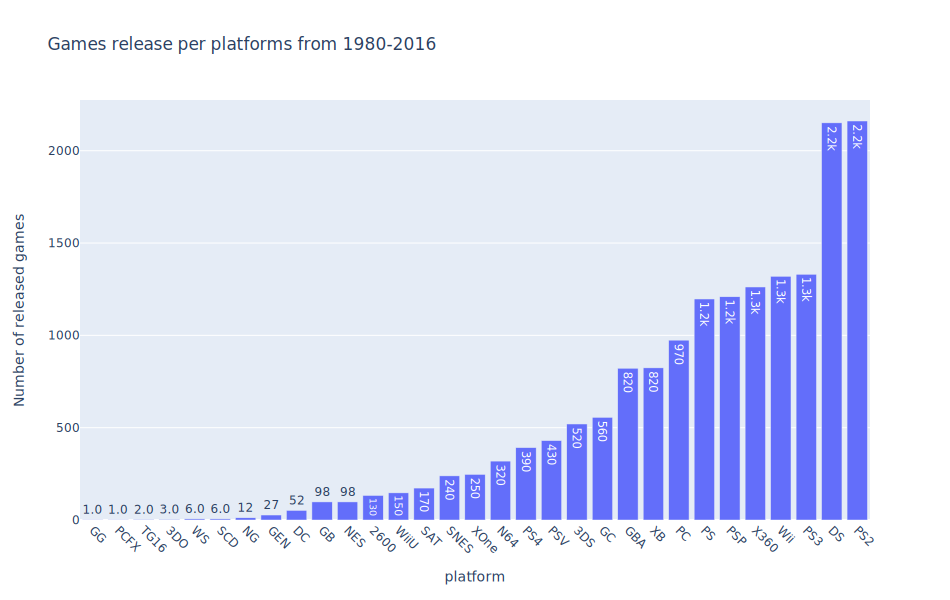

In [20]:
fig = px.bar(games_df.groupby('platform')[['name']].count().sort_values('name', ascending=True).reset_index(),
             x='platform', y='name', title='Games release per platforms from 1980-2016',
             labels={'name':'Number of released games'}, text_auto='0.2s', width=950, height=600)
fig.update_xaxes(tickangle=45)
fig.show()

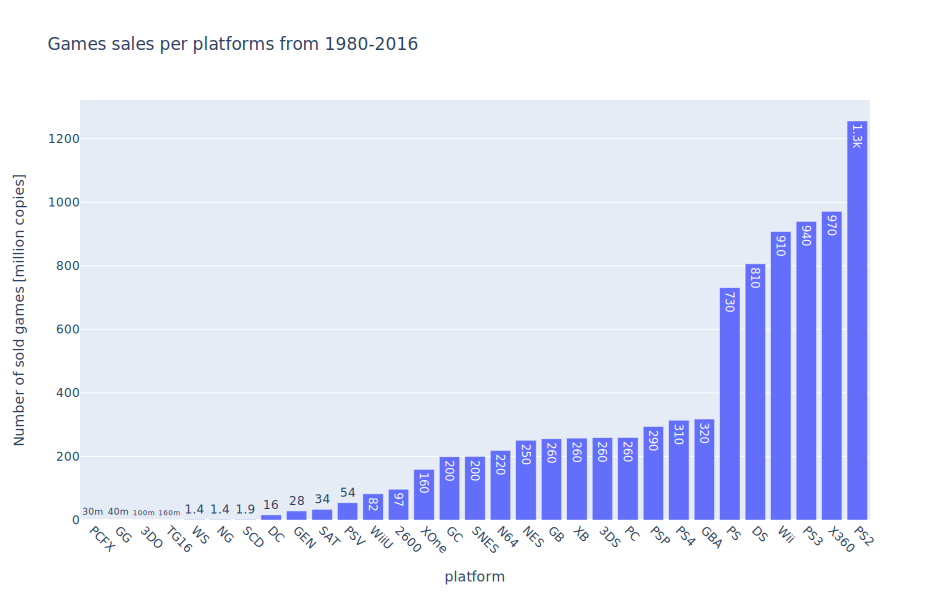

In [21]:
fig = px.bar(games_df.groupby('platform')[['total_sales']].sum().sort_values('total_sales', ascending=True).reset_index(),
             x='platform', y='total_sales', title='Games sales per platforms from 1980-2016',
             labels={'total_sales':'Number of sold games [million copies]'}, text_auto='0.2s', width=950, height=600)
fig.update_xaxes(tickangle=45)
fig.show()

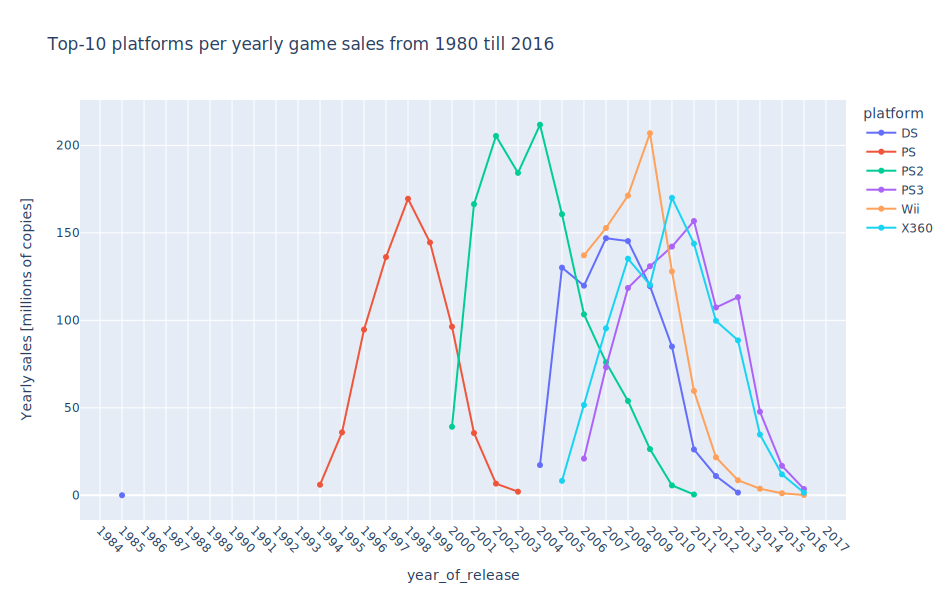

In [22]:
# getting the names of the top 10 platforms by released games
grouped = games_df.groupby('platform')[['total_sales']].sum().sort_values('total_sales', ascending=False).head(6)

# creating a sorted dataframe with top platforms only
top_platforms = games_df[games_df.platform.isin(grouped.index)]

# creating a pivot table with platforms and their game release by year
pivot_top_platforms = pd.pivot_table(top_platforms, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

fig = px.line(pivot_top_platforms, x=pivot_top_platforms.index, y=pivot_top_platforms.columns, 
              title='Top-10 platforms per yearly game sales from 1980 till 2016',
              labels={'x':'Year', 'value': 'Yearly sales [millions of copies]'},
              markers=True, width=950, height=600)
fig.update_layout(xaxis = dict(dtick = 1))
fig.update_xaxes(tickangle=45)
fig.show()

**Median platform lifespan, i.e. how many years games have been released for them.**

In [23]:
pivot_all_platforms = pd.pivot_table(games_df, index='year_of_release', columns='platform',
                                     values='name', aggfunc='count')

In [24]:
# Median lifetime of ALL platforms
pivot_all_platforms.count().median()

7.0

In [25]:
# Median life expectancy of TOP 10 platforms
pivot_top_platforms.count().median()

11.0

**Interim Conclusion:** From the data presented, it is clear that 6 platforms are the leaders in terms of sold copies (PS2, Xbox360, PS3, Nintendo Wii, Nintendo DS, PS1) by a large margin from the rest of the platforms. At the same time, the leaders in terms of the number of released games are PS2 and Nintendo DS with a wide margin from the rest.

## Let's study the data for the "actual period"

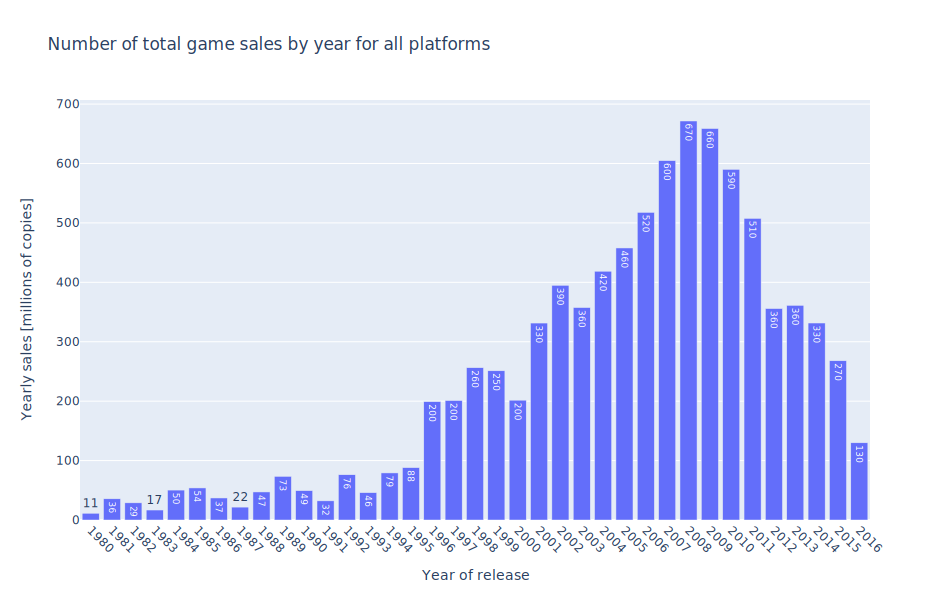

In [26]:
fig = px.bar(games_df.groupby('year_of_release')[['total_sales']].sum().reset_index(), 
             x='year_of_release', y='total_sales', labels={'total_sales':'Yearly sales [millions of copies]', 'year_of_release': 'Year of release'},
             text_auto='.2s', title='Number of total game sales by year for all platforms', width=950, height=600)
fig.update_layout(xaxis = dict(dtick = 1))
fig.update_xaxes(tickangle=45)
fig.show()

As you can see, sales have dropped dramatically since 2011. At the same time, there were no big jumps **from 2012 to 2016** (it should be remembered that the data for 2016 is not complete). **Let's take this time as the current period**, which will help us build a forecast for 2017.

In [27]:
actual_df = games_df[games_df.year_of_release >= 2012]

## Which platforms are leading in sales, rising or falling? Let's choose a few potentially profitable platforms.

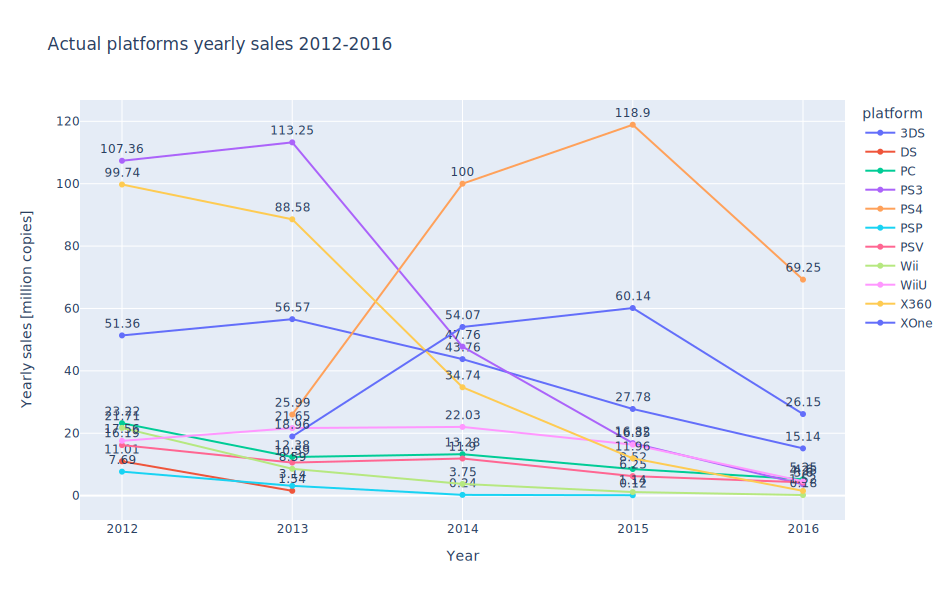

In [28]:
# create a pivot table with sales by year and platform and round the values in it to two decimal places
actual_platform_sales_pivot = pd.pivot_table(actual_df, index='year_of_release',
                              columns='platform', values='total_sales', aggfunc='sum').round(2)
# plotting the graph
fig = px.line(actual_platform_sales_pivot, x=actual_platform_sales_pivot.index, y=actual_platform_sales_pivot.columns,
             title='Actual platforms yearly sales 2012-2016',
              labels={'year_of_release':'Year', 'value': 'Yearly sales [million copies]'}, markers=True, text="value",
              width=950, height=600)
fig.update_layout(xaxis = dict(dtick = 1))
fig.update_traces(textposition="top center")
fig.show()

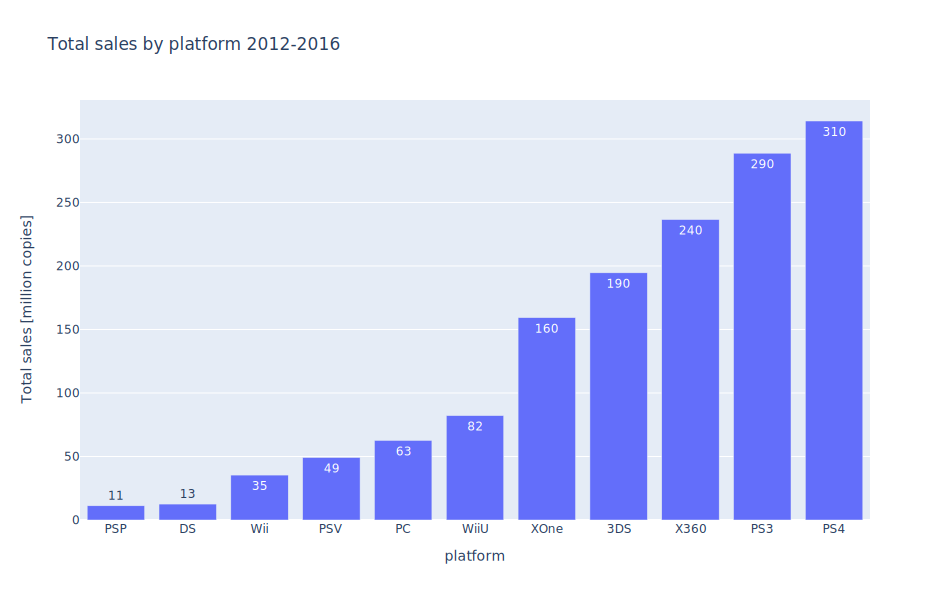

In [29]:
# group platforms by total revenue
actual_platform_sales = actual_df.groupby('platform')[['total_sales']].agg('sum').sort_values('total_sales', ascending=True)

fig = px.bar(actual_platform_sales,
             x=actual_platform_sales.index, y='total_sales',
             title='Total sales by platform 2012-2016',
             labels={'x':'Platform', 'total_sales': 'Total sales [million copies]'},
             text_auto='0.2s', width=950, height=600)
fig.show()

**Intermediate conclusion:** As you can see, sales are declining over the years across all platforms. Of the more relevant platforms from which you can squeeze at least something, we still have:
- PS4
- Xbox one
- Nintendo 3DS

## Plotting a box-plot of global game sales by platform.

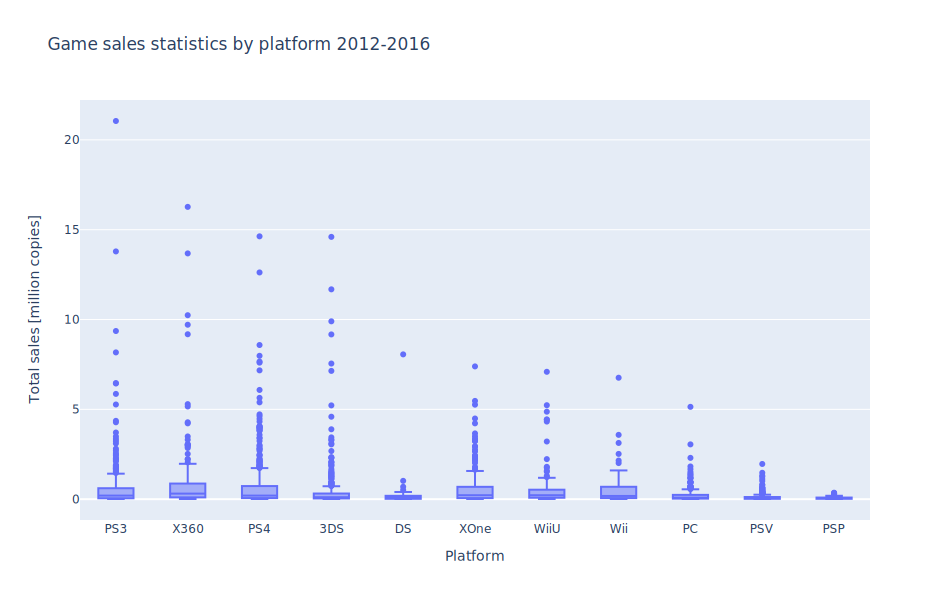

In [30]:
fig = px.box(actual_df, x='platform', y='total_sales', title='Game sales statistics by platform 2012-2016',
             labels={'platform':'Platform', 'total_sales': 'Total sales [million copies]'}, width=950, height=600)
fig.show()

In [31]:
# calculate the median of the medians by sales
actual_df.groupby('platform')[['total_sales']].median().median()

total_sales    0.18
dtype: float64

**Intermediate Finding:** We see that the median sales across all platforms are in the 180K range with outliers for some very successful title which make the main money.

## Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatterplot and calculate the correlation between reviews and sales.

In [32]:
# select PS4 as the most up-to-date platform in the dataset
ps4_actual_df = actual_df[actual_df.platform == 'PS4']

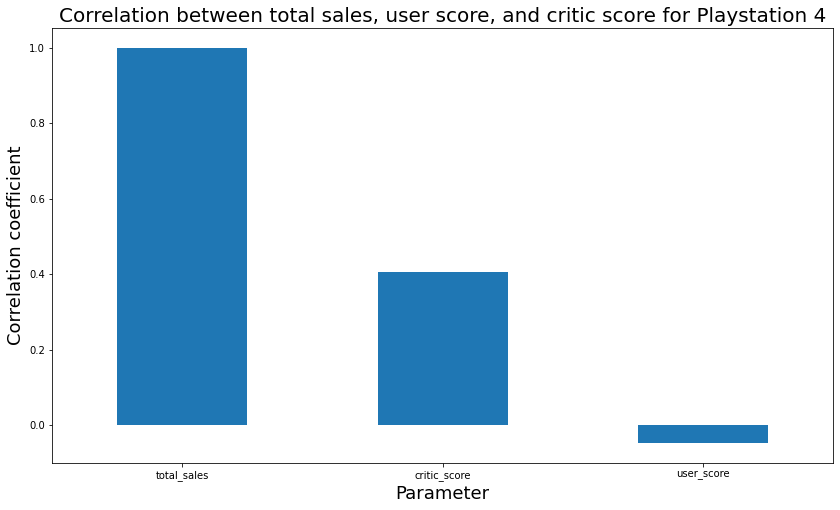

In [33]:
ps4_actual_df[['total_sales', 'user_score', 'critic_score']].corr()['total_sales'].sort_values(ascending=False).plot(kind='bar', figsize=(14,8), rot=0)
plt.title('Correlation between total sales, user score, and critic score for Playstation 4', fontsize=20)
plt.ylabel('Correlation coefficient', fontsize=18)
plt.xlabel('Parameter', fontsize=18)
plt.show()

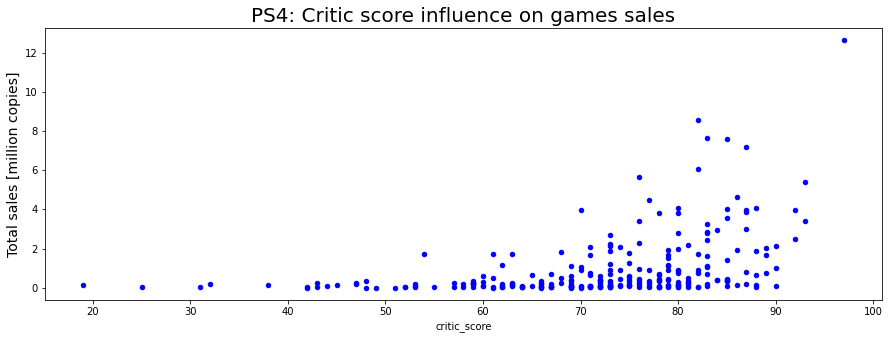

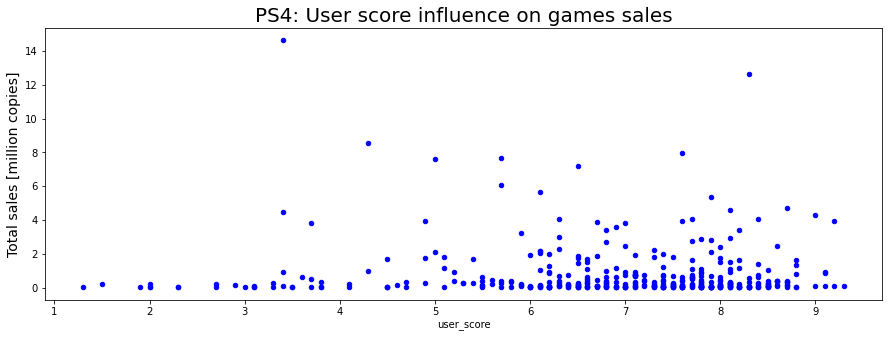

In [34]:
column_names = ['critic_score', 'user_score']
titles = ['PS4: Critic score influence on games sales', 'PS4: User score influence on games sales']

for i, column in enumerate(column_names):
    ps4_actual_df.plot(x = column, y = 'total_sales', kind='scatter', grid=False, color='blue', figsize=(15, 5))
    plt.title(label=titles[i], size=20)
    plt.ylabel('Total sales [million copies]', fontsize=14)

**Intermediate conclusion:** Looking at the parameter correlation plot, we can see that sales of Playstation 4 games are positively correlated with critic ratings and there is no correlation with player ratings. Scatterplots show that sales of games start to rise when critics score over 70 points. At the same time, there are many games with high sales that were rated from 4 to 7 by the users. That is, some games, highly acclaimed by critics and, accordingly, released to good sales figures, were not liked by many users. At the same time, there is a noticeable increase in sales of games with user ratings of about 7.8 points.

## Let's correlate the conclusions with sales of games on other platforms.

In [35]:
# select all platforms except PS4
other_platforms_actual_df = actual_df[actual_df.platform != 'PS4']

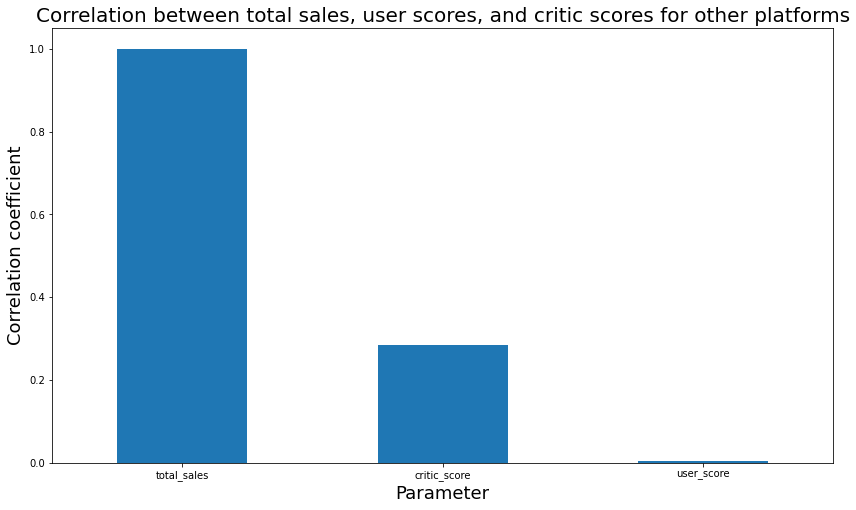

In [36]:
other_platforms_actual_df[['total_sales', 'user_score', 'critic_score']].corr()['total_sales'].sort_values(ascending=False).plot(kind='bar', figsize=(14,8), rot=0)
plt.title('Correlation between total sales, user scores, and critic scores for other platforms', fontsize=20)
plt.ylabel('Correlation coefficient', fontsize=18)
plt.xlabel('Parameter', fontsize=18)
plt.show()

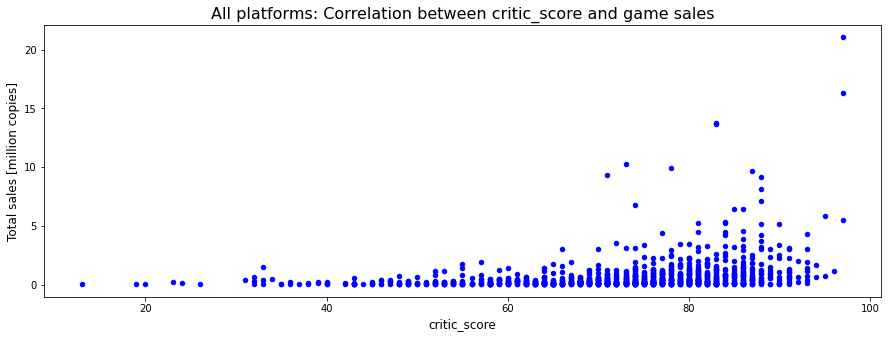

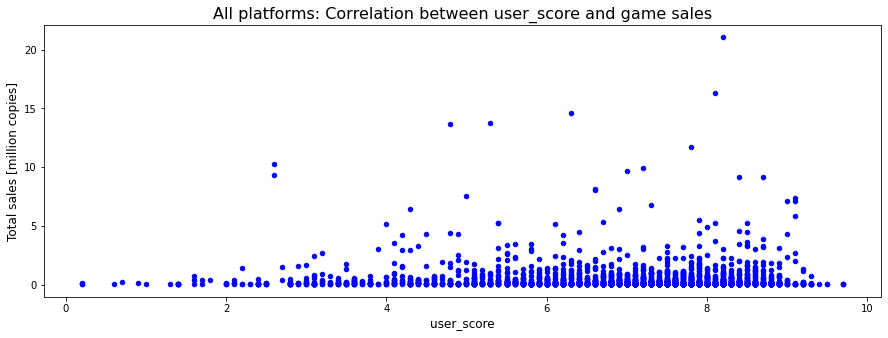

In [37]:
column_names = ['critic_score', 'user_score']

for column in column_names:
    other_platforms_actual_df.plot(x = column, y = 'total_sales', kind='scatter', grid=False, color='blue', figsize=(15, 5))
    plt.ylabel('Total sales [million copies]', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.title(f'All platforms: Correlation between {column} and game sales', fontsize=16)

**Intermediate conclusion:** Looking at the parameters correlation graph, we can see that game sales for other platforms are positively correlated with critic ratings, and have no correlation with player ratings. Scatterplots show that sales of games start to grow if the critics' ratings are more than 50 points (versus 70 for the PS4). At the same time, many games with high sales were rated by users starting from 3 points.

## Let's look at the overall distribution of games by genre

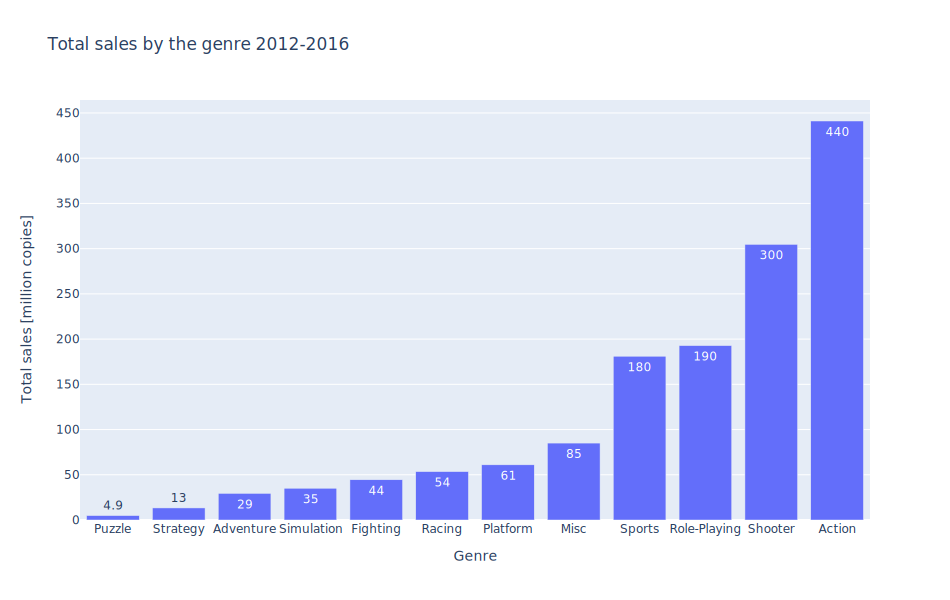

In [38]:
genre_sales = actual_df.groupby('genre')[['total_sales']].sum().sort_values('total_sales',ascending=True)
fig = px.bar(genre_sales, title='Total sales by the genre 2012-2016',
             labels={'value':'Total sales [million copies]', 'genre': 'Genre'}, text_auto='0.2s', width=950, height=600)
fig.update_layout(showlegend=False) 
fig.show()

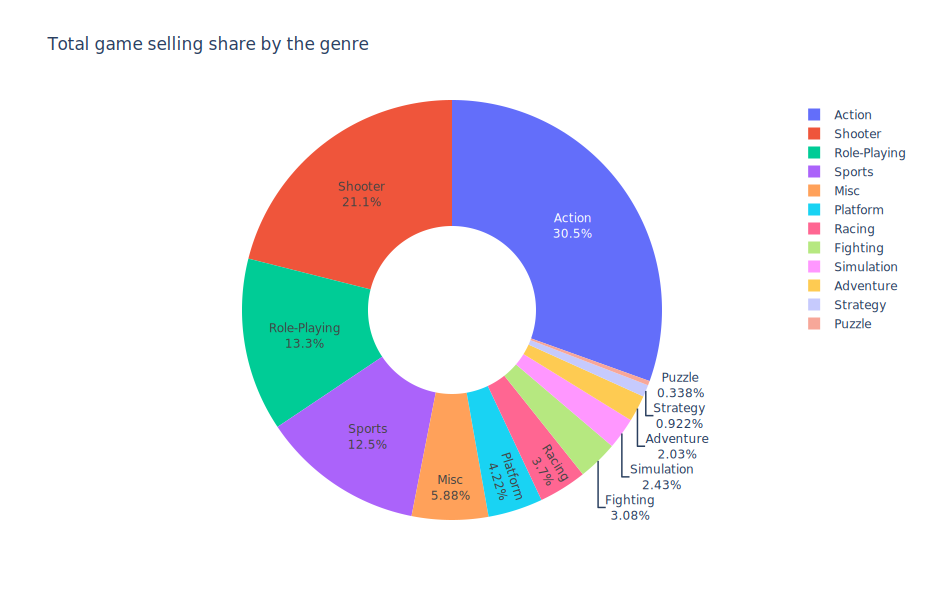

In [39]:
fig = px.pie(genre_sales, values='total_sales', names=genre_sales.index,
             title='Total game selling share by the genre', hover_name=genre_sales.index,
             hole=0.4, width=950, height=600)
fig.update_traces(text = genre_sales.index)
fig.show()

**Intermediate conclusion:** it can be seen that the `Action` genre follows the first sales, followed by `Shooter`, and the third place is shared by `Sports` and `Role-Playing`. Interestingly, strategies are among the lowest in terms of sales.

## Average critics score with users score

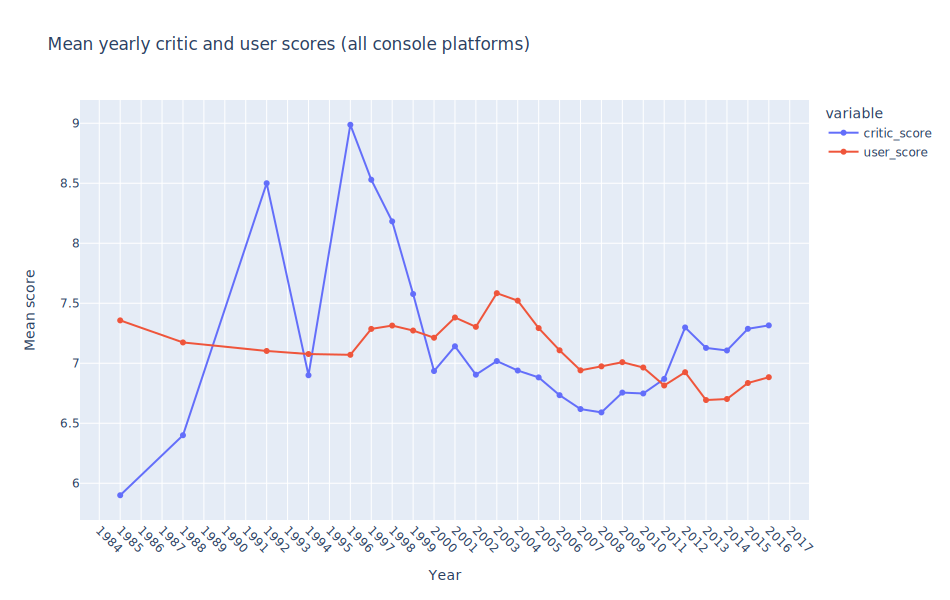

In [40]:
# making a df with yearly mean critic and user scores 
scores = games_df.groupby('year_of_release')[['critic_score', 'user_score']].mean()

# dividing critic scores by 10
scores['critic_score'] = scores['critic_score'].div(10)

# dropping nan values
scores.dropna(inplace=True)

# plotting the graph
fig = px.line(scores, x=scores.index, y=scores.columns, markers=True, width=950, height=600,
              title='Mean yearly critic and user scores (all console platforms)',
              labels={'year_of_release':'Year', 'value': 'Mean score'})
fig.update_layout(xaxis = dict(dtick = 1))
fig.update_xaxes(tickangle=45)
fig.show()

Interesting things happen here. We can see that the average critic score for the games was 8.5 and 9 (just think about this value!) in the year 1992, and 1996, respectively. Interesting, what has happened in 1994 in terms of the critic score. Later we saw a sharp decrease in the critic score, which was even below the user score in the period 2000 - 2010. The maximum user score achieved, was in the year 2003 (~7.6). Since 2011 the average critic score is higher than the user score again.

# User portrait for each region
## Define for the user of each region (NA, EU, JP):

### Most popular platforms by region
#### North America

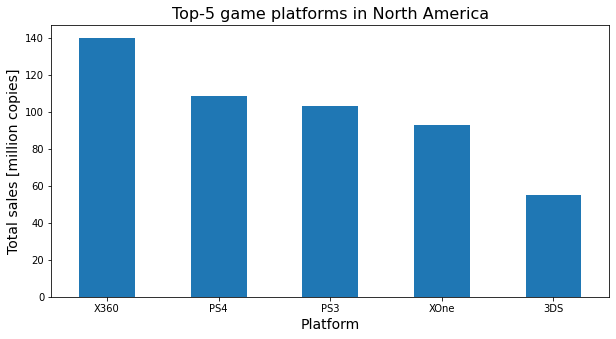

In [41]:
na_top_platforms = actual_df.groupby('platform')[['na_sales']].agg(['sum']).sort_values([('na_sales', 'sum')], ascending=False).head()
na_top_platforms.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game platforms in North America', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

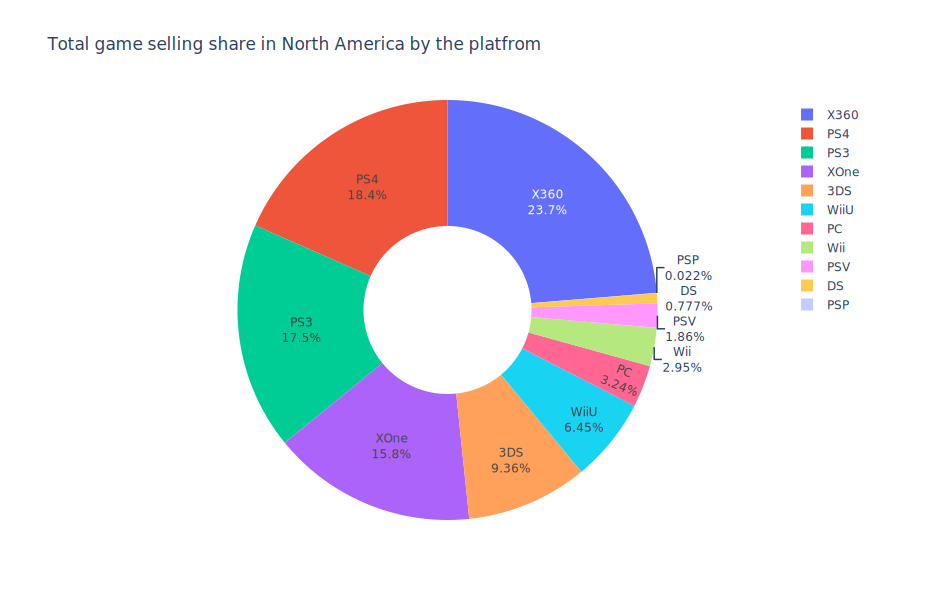

In [42]:
fig = px.pie(actual_df, values=actual_df['na_sales'], names=actual_df['platform'],
             title='Total game selling share in North America by the platfrom', hole=0.4, width=950, height=600)
fig.update_traces(text = actual_df['platform'])
fig.show()

#### Europe

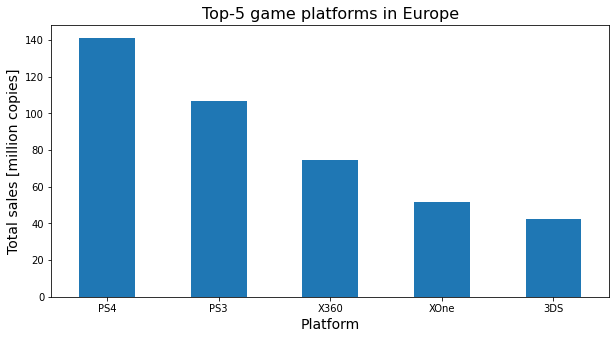

In [43]:
eu_top_platforms = actual_df.groupby('platform')[['eu_sales']].agg(['sum']).sort_values([('eu_sales', 'sum')], ascending=False).head()
eu_top_platforms.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game platforms in Europe', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

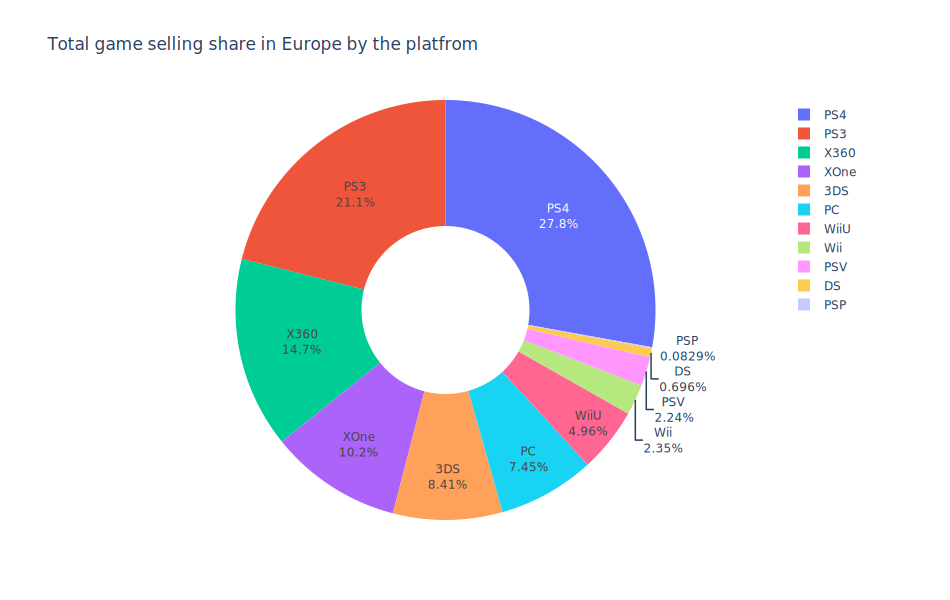

In [44]:
fig = px.pie(actual_df, values=actual_df['eu_sales'], names=actual_df['platform'],
             title='Total game selling share in Europe by the platfrom', hole=0.4, width=950, height=600)
fig.update_traces(text = actual_df['platform'])
fig.show()

#### Japan

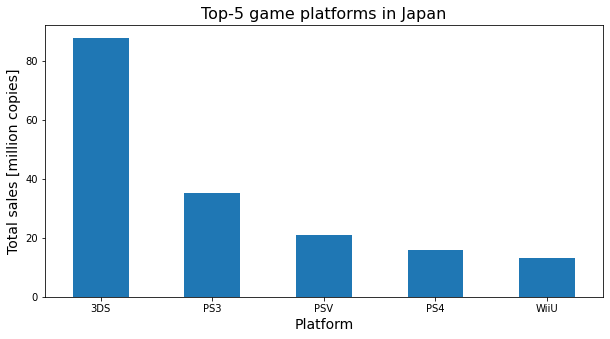

In [45]:
jp_top_platforms = actual_df.groupby('platform')[['jp_sales']].agg(['sum']).sort_values([('jp_sales', 'sum')], ascending=False).head()
jp_top_platforms.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game platforms in Japan', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

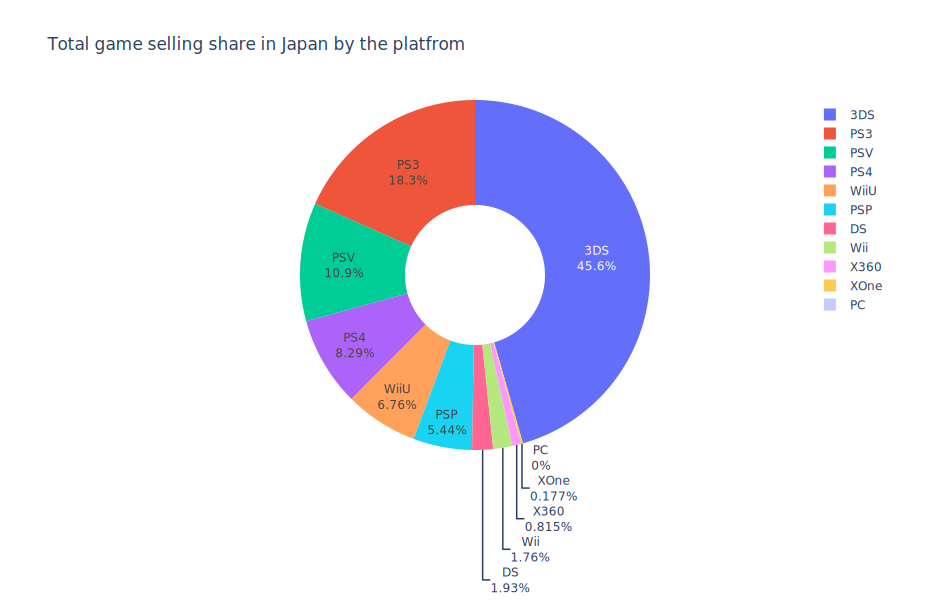

In [46]:
fig = px.pie(actual_df, values=actual_df['jp_sales'], names=actual_df['platform'],
             title='Total game selling share in Japan by the platfrom', hole=0.4, width=950, height=600)
fig.update_traces(text = actual_df['platform'])
fig.show()

**Intermediate Finding:** The most popular platforms vary widely across regions. Japan stands out the most.
In North America and Europe, stationary platforms are popular with a fairly gradual decline in popularity, while in Japan the most popular platform is the mobile Nintendo 3DS, with a very strong margin from the rest.

### Most popular genres by region

#### North America

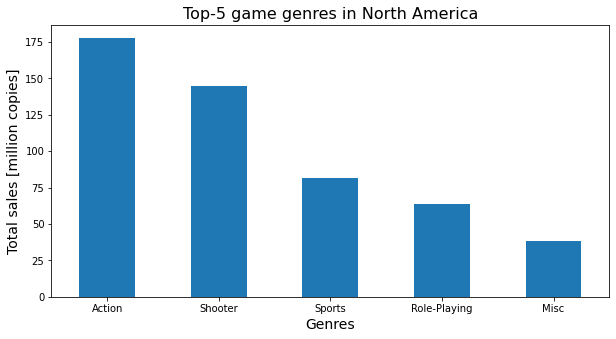

In [47]:
na_top_genres = actual_df.groupby('genre')[['na_sales']].agg(['sum']).sort_values([('na_sales', 'sum')], ascending=False).head()
na_top_genres.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game genres in North America', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

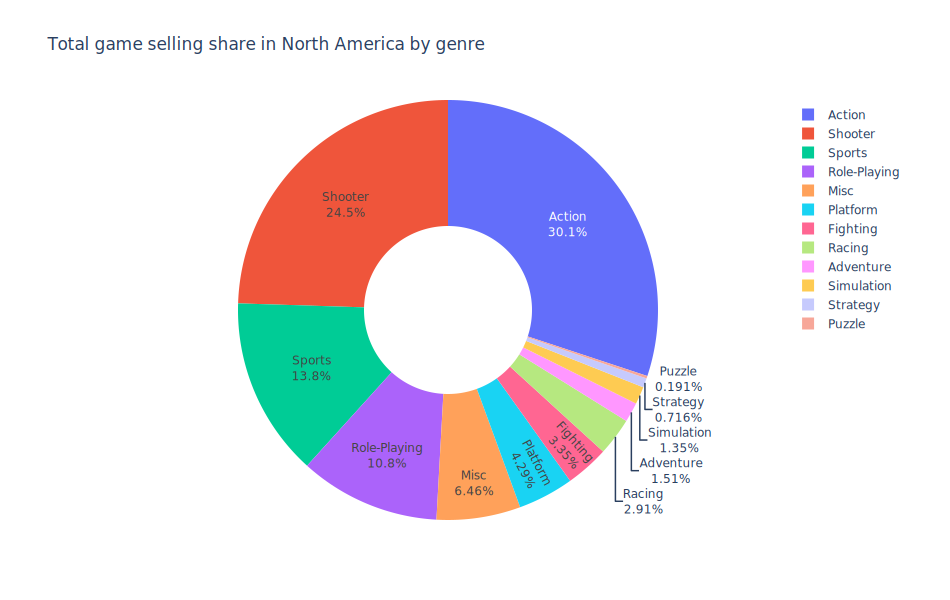

In [48]:
fig = px.pie(actual_df, values=actual_df['na_sales'], names=actual_df['genre'],
             title='Total game selling share in North America by genre', hole=0.4, width=950, height=600)
fig.update_traces(text = actual_df['genre'])
fig.show()

#### Europe

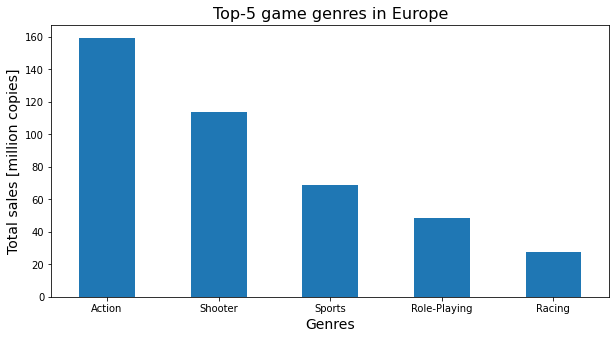

In [49]:
eu_top_genres = actual_df.groupby('genre')[['eu_sales']].agg(['sum']).sort_values([('eu_sales', 'sum')], ascending=False).head()
eu_top_genres.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game genres in Europe', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

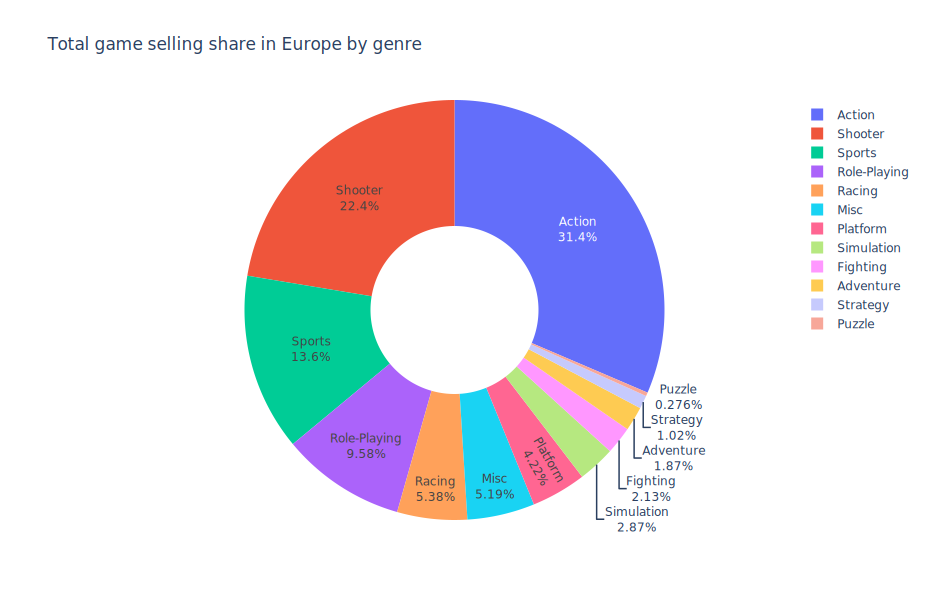

In [50]:
fig = px.pie(actual_df, values=actual_df['eu_sales'], names=actual_df['genre'],
             title='Total game selling share in Europe by genre', hole=0.4, width=950, height=600)
fig.update_traces(text = actual_df['genre'])
fig.show()

#### Japan

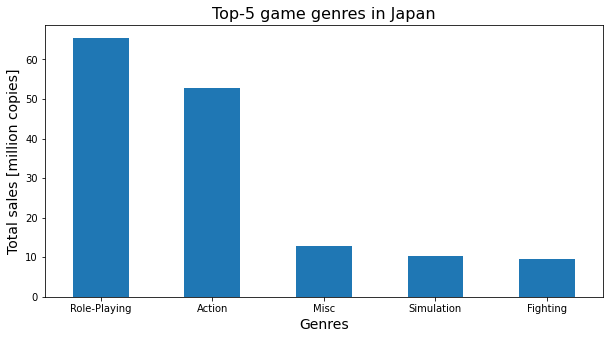

In [51]:
jp_top_genres = actual_df.groupby('genre')[['jp_sales']].agg(['sum']).sort_values([('jp_sales', 'sum')], ascending=False).head()
jp_top_genres.plot(kind='bar', rot=0, legend=False, figsize=(10, 5))
plt.title('Top-5 game genres in Japan', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total sales [million copies]', fontsize=14)
plt.show()

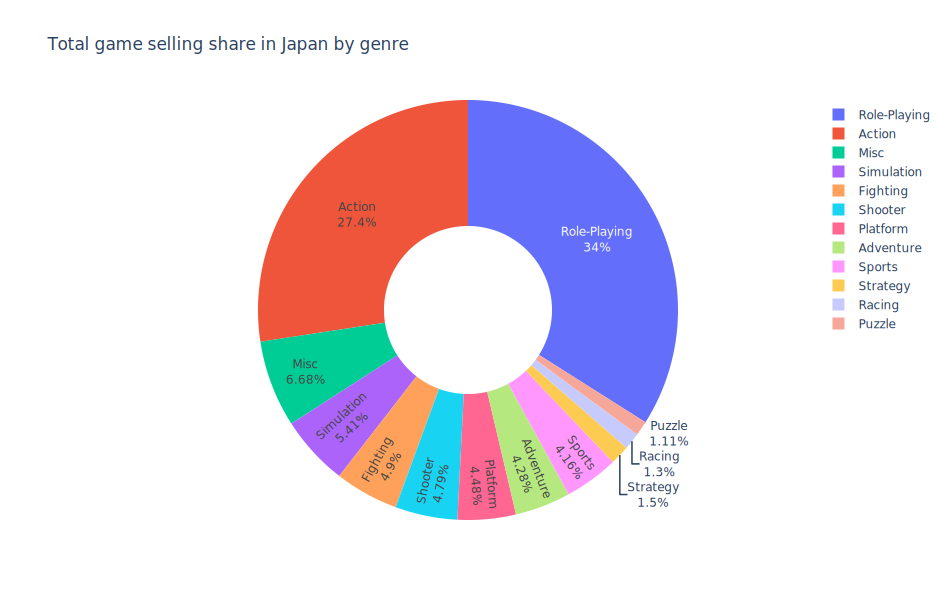

In [52]:
fig = px.pie(actual_df, values=actual_df['jp_sales'], names=actual_df['genre'],
             title='Total game selling share in Japan by genre', hole=0.4, width=950, height=600)
fig.update_traces(text = actual_df['genre'])
fig.show()

**Промежуточный вывод:** Самые популярные жанры в Северной Америке и Европе они практически идентичны, кроме пятой позиции. В Японии же на первом месте `Role-Playing` и на втором уже `Action`.

### Does the ESRB rating affect sales in a particular region?
#### North America

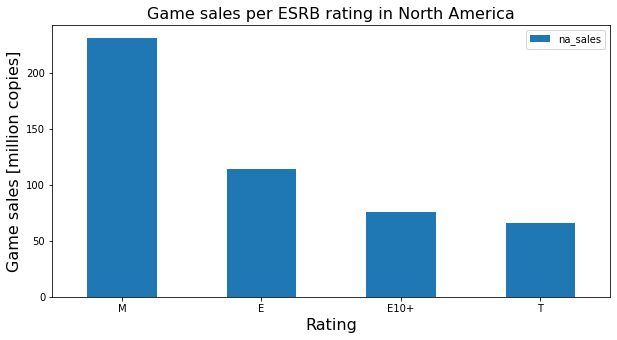

In [53]:
na_rating_sales = actual_df.groupby('rating')[['na_sales']].sum().sort_values('na_sales',ascending=False)
na_rating_sales.plot(kind='bar', rot=0, figsize=(10, 5))
plt.title('Game sales per ESRB rating in North America', fontsize=16)
plt.ylabel('Game sales [million copies]', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

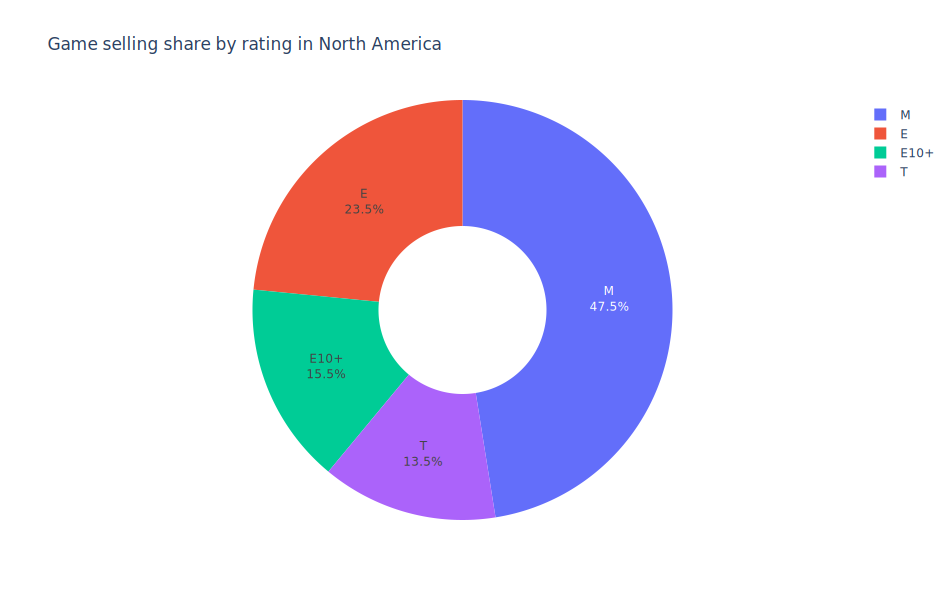

In [54]:
fig = px.pie(na_rating_sales, values='na_sales', names=na_rating_sales.index,
             title='Game selling share by rating in North America', hole=0.4, width=950, height=600)
fig.update_traces(text = na_rating_sales.index)
fig.show()

#### Europe

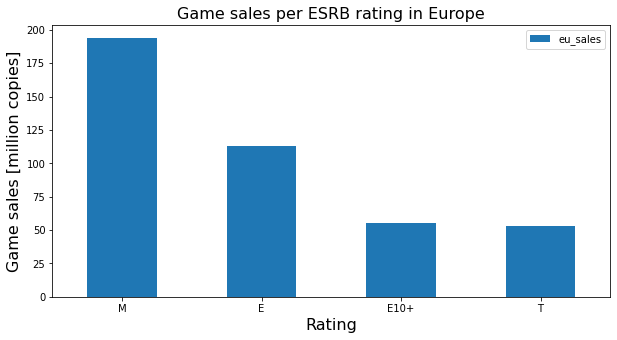

In [55]:
eu_rating_sales = actual_df.groupby('rating')[['eu_sales']].sum().sort_values('eu_sales',ascending=False)
eu_rating_sales.plot(kind='bar', rot=0, figsize=(10, 5))
plt.title('Game sales per ESRB rating in Europe', fontsize=16)
plt.ylabel('Game sales [million copies]', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

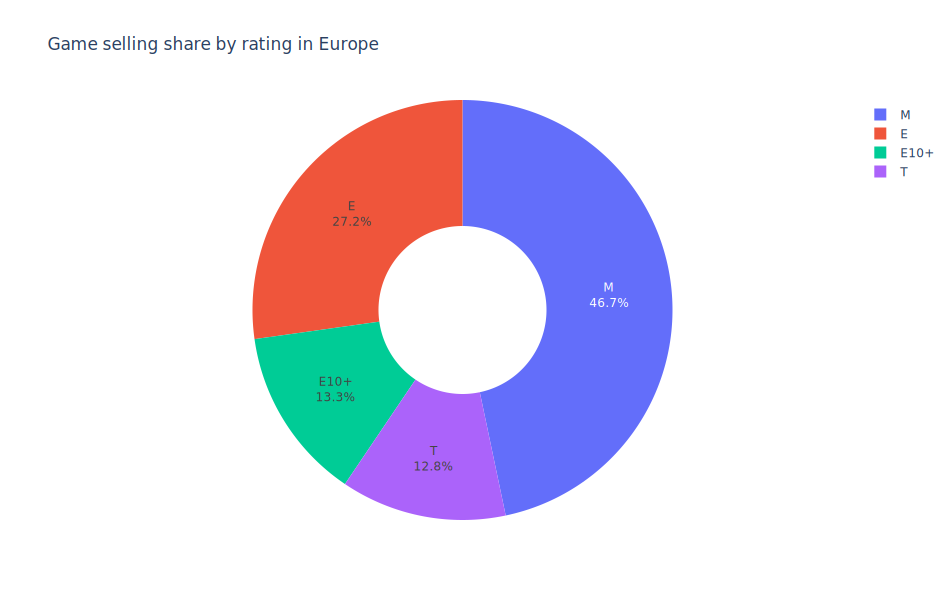

In [56]:
fig = px.pie(eu_rating_sales, values='eu_sales', names=eu_rating_sales.index,
             title='Game selling share by rating in Europe', hole=0.4, width=950, height=600)
fig.update_traces(text = eu_rating_sales.index)
fig.show()

#### Japan

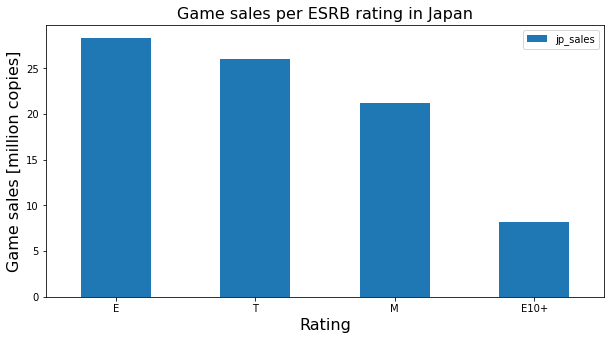

In [57]:
jp_rating_sales = actual_df.groupby('rating')[['jp_sales']].sum().sort_values('jp_sales',ascending=False)
jp_rating_sales.plot(kind='bar', rot=0, figsize=(10, 5))
plt.title('Game sales per ESRB rating in Japan', fontsize=16)
plt.ylabel('Game sales [million copies]', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

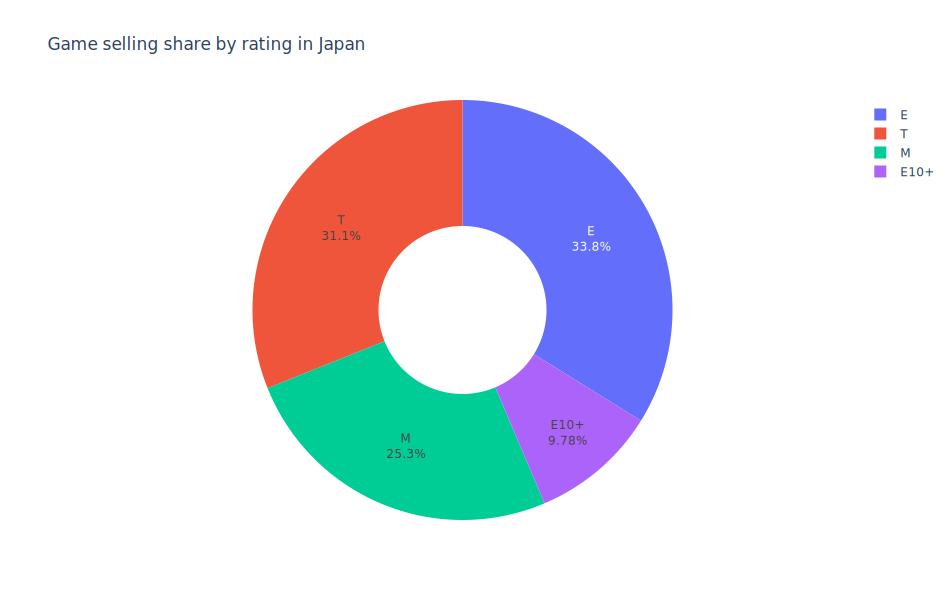

In [58]:
fig = px.pie(jp_rating_sales, values='jp_sales', names=jp_rating_sales.index,
             title='Game selling share by rating in Japan', hole=0.4, width=950, height=600)
fig.update_traces(text = jp_rating_sales.index)
fig.show()

**Intermediate conclusion:** Rating classification:
- E - Everyone (all ages)
- T - Teen (13+)
- M - Mature (17+)
- E10+ - Everyone 10+

The main sales in North America and Europe according to the ESRB ratings are unevenly distributed, almost the same for both regions, and the bulk of sales are in the category **M** i.e. for the age group 17+.
In Japan, the main sales by category are distributed more evenly and the bulk falls on the categories **E**, **T** and **M**.

# Testing hypotheses
## Average user ratings for Xbox One and PC platforms are the same;

The null hypothesis would be the statement that: the average user ratings of the Xbox One and PC platforms are the same.

Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are NOT the same.

To test these statements, we use the "Hypothesis about the equality of the means of two general populations", since populations are independent of each other, and their sample means are normally distributed.
Both samples are almost the same size, we will not set the `equal_var` parameter.

In [59]:
len(actual_df[actual_df.platform=='XOne']['user_score'])

247

In [60]:
len(actual_df[actual_df.platform=='PC']['user_score'])

250

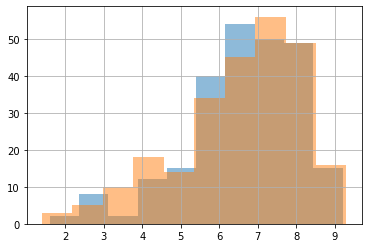

In [61]:
# посмотрим распределение оценок в двух генеральных совокупностях.
actual_df[actual_df.platform=='XOne']['user_score'].hist(alpha=0.5)
actual_df[actual_df.platform=='PC']['user_score'].hist(alpha=0.5)
plt.show()

In [62]:
alpha = .05

result = st.ttest_ind(actual_df[actual_df.platform=='XOne']['user_score'],
                      actual_df[actual_df.platform=='PC']['user_score'])

print(f'p-value = {result.pvalue}')

if result.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value = 0.613908387662496
Failed to reject the null hypothesis


**Intermediate conclusion:** As we can see from the statistical test, the null hypothesis could not be rejected. This means that the average user ratings of the Xbox One and PC platforms are the same.

## The average user ratings for the Action and Sports genres are different.

The null hypothesis would be that: The average user ratings for the Action and Sports genres are *same*.

Alternative Hypothesis: Average user ratings for Action and Sports are *different*.

To test these statements, we use the "Hypothesis about the equality of the means of two general populations", since populations are independent of each other, and their sample means are normally distributed.
Samples vary greatly in size, the `equal_var` parameter will be set to `False`.

Set the alpha threshold yourself.

**Explain:**

- How did you formulate the null and alternative hypotheses;
- What criterion was used to test the hypotheses and why.

In [63]:
len(actual_df[actual_df.genre=='Sports']['user_score'])

268

In [64]:
len(actual_df[actual_df.genre=='Action']['user_score'])

1031

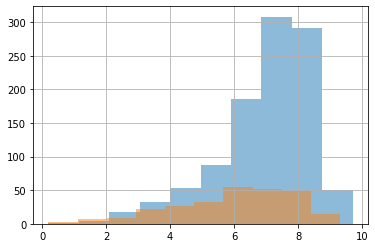

In [65]:
# Let's look at the distribution of scores in the two populations.
actual_df[actual_df.genre=='Action']['user_score'].hist(alpha=0.5)
actual_df[actual_df.genre=='Sports']['user_score'].hist(alpha=0.5)
plt.show()

In [66]:
alpha = .05

result = st.ttest_ind(actual_df[actual_df.genre=='Action']['user_score'],
                      actual_df[actual_df.genre=='Sports']['user_score'], equal_var=False)

print(f'p-value = {result.pvalue}')

if result.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value = 2.8545572615994676e-15
Rejecting the null hypothesis


**Intermediate conclusion:** As we can see from the statistical test, the null hypothesis was rejected. This means that the average user ratings for the Action and Sports genres are different.

# General Conclusion

In this work, the data was prepared for processing (column names were replaced; data types were converted; gaps were filled, where possible, etc.). Also, the total sales for all regions were calculated.

From the exploratory data analysis, it can be seen that in the period 1980-1994 the number of annually released games grew rather slowly. The period 1994-2008 saw a sharp increase in the number of released titles, the period 2009-2012 showed a sharp decline in the number of released games, and the period 2012-2016 is characterized by a gradual decrease in the number of released games returning to the values of the late 90s and early 00s. The situation is similar with sales. Most likely, the main reason for such a drop may be that the number of gaming platforms does not include mobile phones, which "devoured" all these sales and releases - developers and users have switched their focus there.

Playstation 2 and Nintendo DS are the leaders among all platforms in terms of the number of released games by a wide margin. At the same time, the platforms with the largest game sales are the Playstation 2 and XBox 360. The median "lifespan" of all platforms is 7 years, while the top platforms "live" for 11 years.

In the "current period" (2012-2016), Plastation 4, XBox One and Nintendo 3DS still have some commercial value in terms of annual sales. The median number of sales for each of the platforms in the current period does not differ much and is about 180 thousand copies sold, with very strong outliers for some very popular games, which, apparently, bring profit to publishers.

The study also showed a positive correlation between game sales and critical reviews. User ratings have no correlation with game sales. In the current period, the most profitable genres are Action and Shooter, by a wide margin from the rest. This may be due to the fact that the game is bought mainly by the male audience.

The user profiles of the North America and Europe regions as a whole practically coincide and have only slight differences in the preferences of gaming platforms (the most popular platform in North America is the Xbox360, and in Europe the Playstation 4), i.е. in these regions, stationary gaming platforms are mostly popular. In both regions, sales by age categories are uneven and the bulk (about half) falls on the category "M" (17+).

In Japan, the user profile is significantly different from the "western" - the most popular, by a wide margin from the rest, is the mobile platform Nintendo 3DS, and the most popular genre is Role-Playing, and Action is already in second place, by a wide margin from the rest. The distribution of sales by rating is much more even than in the "west" and is mainly represented by categories E, T, and M.

At the end, hypotheses were explored:
- about the fact that the average user ratings of the Xbox One and PC platforms are the same and this hypothesis was not rejected.
- about the fact that the average user ratings of the Action and Sports genres are the same, and this hypothesis was rejected.

As a result, in order to make a profit in the markets of North America and Europe, it is worth focusing on the PS4 and Xbox One platforms, and the genres are Action and Shooter. In Japan, it is worth focusing mainly on the Nintendo 3DS and the Role-Playing and Action genres.